#### This is a [jupyter](https://jupyter.org/) notebook that contains text, equations, images and executable code in one document.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Finite Elements: Shape Functions
After we have partitioned the domain into finite elements, the next step is to interpolate the unknown function (e.g. the sound pressure distribution) using the values at the nodes. Here, we can use the partition into elements to our advantage: instead of formulating a very complicated interpolation that includes all nodes at once, we approach the task of interpolation per element. That means we would have to interpolate just the within one element instead of the whole domain.

If we consider just the domain $\Omega$ of one element, the function $p$ can be interpolated using:

\begin{equation}
p(\mathbf{x})=\sum_i N_i(\mathbf{x}) p_i=\mathbf{N}^\mathrm{T}\mathbf{p},\quad \quad\mathbf{x} \in\Omega
\end{equation}

where $i$ are the $N_i$ nodes of the finite element. 

The interpolating functions are called the **shape functions** $N_i$ because they could also be used to interpolate the shape of the element. $p_i$ are the values of the field quantity $p_i$ at the nodes.

### 1D Element
A 1D element could be used in the context of 1D domain, for example the sound field in a tube. We use this case here as a simple example because it depends on just one coordinate. The most simple 1D finite element has just two nodes.

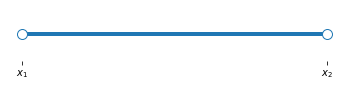

In [2]:
plt.figure(1,(6,1))
plt.plot((-1,1),(0,0),'o-',ms=10,lw=4,mfc='w')
plt.box()
plt.xticks((-1,1),(r'$x_1$',r'$x_2$'))
plt.yticks([]);

Now, the most simple function we can use would be a linear function (a constant function is even more simple, but has other problems here). This function we could write down in the usual form

\begin{equation}
p(x)=a x + b.
\end{equation}

However, it is not immediately clear how the coefficients $a$ and $b$ are related to $p_1$ and $p_2$. By considering $p_1=p(x_1)$ and $p_2=p(x_2)$ it is possible to rewrite the linear function in the following form:

\begin{equation}
p(x) = \frac{x_2-x}{x_2-x_1} p_1 + \frac{x-x_1}{x_2-x_1} p_2 = N_1(x) p_1 + N_2(x) p_2,
\end{equation}

where it becomes clear that we have two (linear) shape functions $N_1$ and $N_2$. These can also be seen as _weights_ to the function values at the nodes.

Because each element would have different $x_1$ and $x_2$, it make sense to define a new coordinate system where the nodes have the same coordinates for each element. This is then called a __local coordinate system__. For this, we define the local coordinate $r$ which is within the range (-1,1). At $x=x_1$, node 1, $r=-1$ and at $x=x_2$, node 2, $r=1$. Then,

\begin{equation}
N_1(r)=\frac{1}{2}(1-r),\, \, \, N_2(r)=\frac{1}{2}(1+r).
\end{equation}

If plotted together with the element, the shape functions look like this:

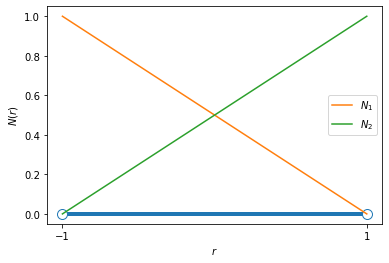

In [3]:
def N1(r):
    return (1-r)/2

def N2(r):
    return (1+r)/2

r = np.linspace(-1,1,20)
plt.figure()
plt.plot((-1,1),(0,0),'o-',ms=10,lw=4,mfc='w')
for n,N in enumerate((N1,N2)):
    plt.plot(r,N(r),label=r'$N_%i$' % (n+1))
plt.xticks((-1,1))
plt.legend()
plt.xlabel(r'$r$')
plt.ylabel(r'$N(r)$');


Interestingly, these shape functions also allow to transform the local $r$ coordinate back into the __global coordinate__ $x$:

\begin{equation}
x = N_1(r) x_1 + N_2(r) x_2.
\end{equation}

In a more general formulation for any type and dimension of element, this is

\begin{equation}
\mathbf{x}=\sum_i N_i(\mathbf{r}) x_i=\mathbf{N}(\mathbf{r})^\mathrm{T}\mathbf{x}_i.
\end{equation}

The number of shape functions equals the number of nodes. As a 1D element may have more than two nodes, we consequently get more than just two shape functions. For the example of a three-node element, the nodes are at $r=-1,r=0,r=1$ and the shape functions are second order polynomials:

\begin{gather}
N_1(r) = \frac{r}{2}(r-1)\\
N_2(r) = -(r-1)(r+1)\\
N_3(r) = \frac{r}{2}(r+1)
\end{gather}

Lets plot these:

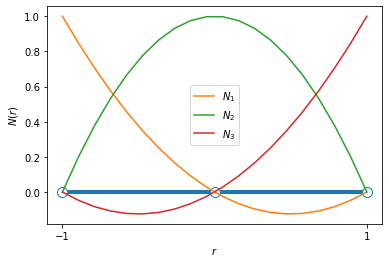

In [4]:
def N1(r):
    return r*(r-1)/2

def N2(r):
    return -(r-1)*(r+1)

def N3(r):
    return r*(r+1)/2

plt.plot((-1,0,1),(0,0,0),'o-',ms=10,lw=4,mfc='w')
for n,N in enumerate((N1,N2,N3)):
    plt.plot(r,N(r),label=r'$N_%i$' % (n+1))
plt.xticks((-1,1))
plt.legend()
plt.xlabel(r'$r$')
plt.ylabel(r'$N(r)$');


Now we can turn our attention to some interesting properties or requirements for the shape functions:
* they are zero outside the element: $N_i(\mathbf{r})=0$ if $\mathbf{r} \notin \Omega$
* they are zero at every node, except one, where they are one: $N_i(\mathbf{r}_j)=\begin{cases}1,& i=j\\ 0,& i\neq j\end{cases}$

### 2D Element
In the case of a 2D element the shape functions are chosen in a similar fashion, except that they are depend on two local coordinates $r,s$. For the example of a quadrilateral element with four nodes, we can use bilinear functions:

\begin{gather}
N_1 = \frac{1}{4} (1-r) (1-s)\\
N_2 = \frac{1}{4} (1+r) (1-s)\\
N_3 = \frac{1}{4} (1+r) (1+s)\\
N_4 = \frac{1}{4} (1-r) (1+s)
\end{gather}

If we want to see how these functions look like, we have to use a 3D plot:

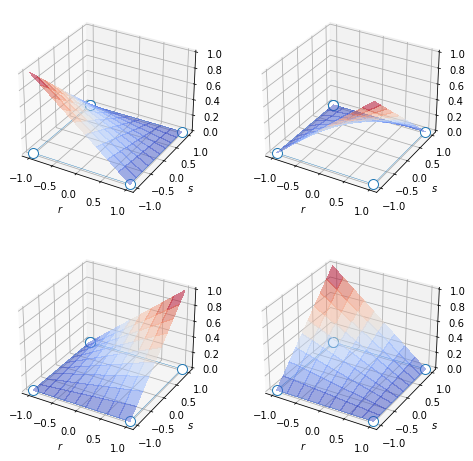

In [5]:
# defining bilinear shape functions with quick lambda function definitions:
N1 = lambda r,s: 1/4 * (1-r) * (1-s)
N2 = lambda r,s: 1/4 * (1+r) * (1-s)
N3 = lambda r,s: 1/4 * (1+r) * (1+s)
N4 = lambda r,s: 1/4 * (1-r) * (1+s)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
r,s = np.mgrid[-1:1:10j,-1:1:10j]
for n,N in enumerate((N1,N2,N3,N4)):
    ax = fig.add_subplot(2, 2, n+1, projection='3d')
    ax.plot((-1,1,1,-1,-1),(1,1,-1,-1,1),(0,0,0,0,0), 'o-',ms=10,lw=0.4,mfc='w')
    ax.plot_surface(r, s, N(r,s),linewidth=0,antialiased=False,
                    alpha=0.5,cmap='coolwarm')
    ax.set_xlabel(r'$r$')
    ax.set_ylabel(r'$s$')


This finite element may have the shape of a general quadrilateral. In this case we can use the coordinate transformation to get an interpolation in global coordinates from the shape functions in local coordinates.

For a demonstration we assume a distorted finite element:

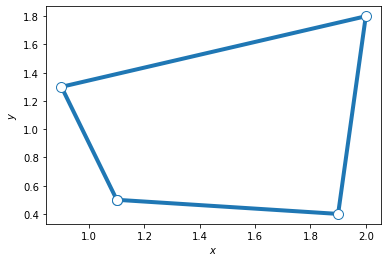

In [6]:
# node coords global
xi = np.array((1.1,1.9,2.0,0.9))
yi = np.array((0.5,0.4,1.8,1.3))
plt.figure()
plt.plot(xi[[0,1,2,3,0]],yi[[0,1,2,3,0]],'o-',ms=10,lw=4,mfc='w')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Now we can:
1. compute the global coordinates for any point $(r,s)$ inside the element
2. plot the distorted shape functions

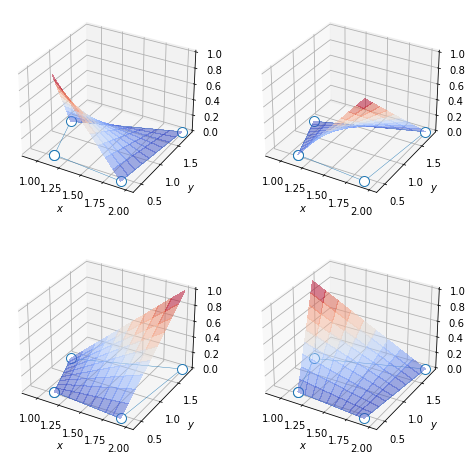

In [7]:
fig = plt.figure(figsize=(8,8))
# transform to global coords
xx = [N(r,s)*xi[n] for n,N in enumerate((N1,N2,N3,N4))] #four summands N_i*x_i
x = np.array(xx).sum(0)
yy = [N(r,s)*yi[n] for n,N in enumerate((N1,N2,N3,N4))]
y = np.array(yy).sum(0)

for n,N in enumerate((N1,N2,N3,N4)):
    ax = fig.add_subplot(2, 2, n+1, projection='3d')
    ax.plot(xi[[0,1,2,3,0]],yi[[0,1,2,3,0]],'o-',ms=10,lw=0.4,mfc='w')
    ax.plot_surface(x, y, N(r,s),linewidth=0,antialiased=False,
                    alpha=0.5,cmap='coolwarm')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

Finally, we can interpolate the function $p(\mathbf{x})$ over the distorted element. In order to do so, the values at the nodes are needed. In what follows, we assume some arbitrary values:

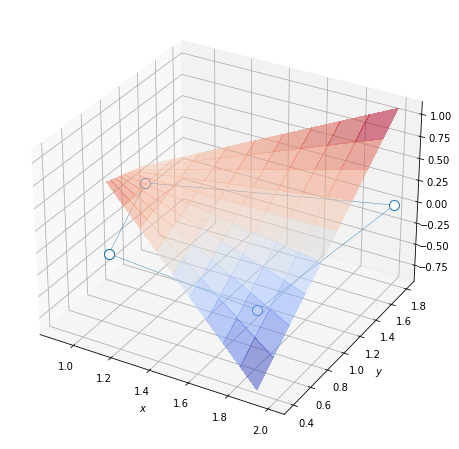

In [8]:
# arbitrary values at the nodes
value_at_nodes = np.array((0.8,-0.9,1.1,0.2))

# interpolation
iv = xx = [N(r,s)*value_at_nodes[n] for n,N in enumerate((N1,N2,N3,N4))]
interpolated_value = np.array(iv).sum(0)

#plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(xi[[0,1,2,3,0]],yi[[0,1,2,3,0]],'o-',ms=10,lw=0.4,mfc='w')
ax.plot_surface(x, y, interpolated_value,linewidth=0,antialiased=False,
                    alpha=0.5,cmap='coolwarm')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

#### License

This notebook is an [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text and the images are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), and any code under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Ennes Sarradj, Numerical Acoustics: Finite Elements: Shape Functions, 2020.